# TiTanic

- 데이터 읽기
- 전처리
- 모델 적용
- 모델 최적화
- 모델 평가
- 파이프라인

# 0. 파일 불러오기

In [411]:
# 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message) 무시

import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import seaborn as sns
sns.set_style('dark')

# 그래프를 더 높은 해상도로 출력한다.
%config InlineBackend.figure_format = 'retina'

In [412]:
# kaggle.json을 .kaggle폴더를 생성한 후에 그 폴더로 복사한다.
# 폴더를 생성
!mkdir -p ~/.kaggle
# 생성된 폴더로 복사
!cp kaggle.json ~/.kaggle

# 읽기/쓰기 권한을 준다.
!chmod 600 ~/.kaggle/kaggle.json

In [413]:
# 시스템 관리자 권한으로 /root/.kaggle/ 폴더에 파일이 복사됐는지 확인

!sudo ls -al ~/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Aug 23 04:15 .
drwx------ 1 root root 4096 Aug 23 04:14 ..
-rw------- 1 root root   64 Aug 23 08:36 kaggle.json


In [414]:
# train.csv와 test.csv파일을 /content 폴더에 다운로드
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [415]:
# 타이타닉 폴더만들기

!mkdir -p titanic

In [416]:
# 압출 풀기

import zipfile
with zipfile.ZipFile('/content/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/titanic')


In [417]:
# 학습 데이터와 테스트 데이터 읽어오기

train = pd.read_csv('/content/titanic/train.csv')
test = pd.read_csv('/content/titanic/test.csv')

print (train.shape, test.shape)
print(train.info())

(891, 12) (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# 1. 데이터 읽고 전체 상황 확인

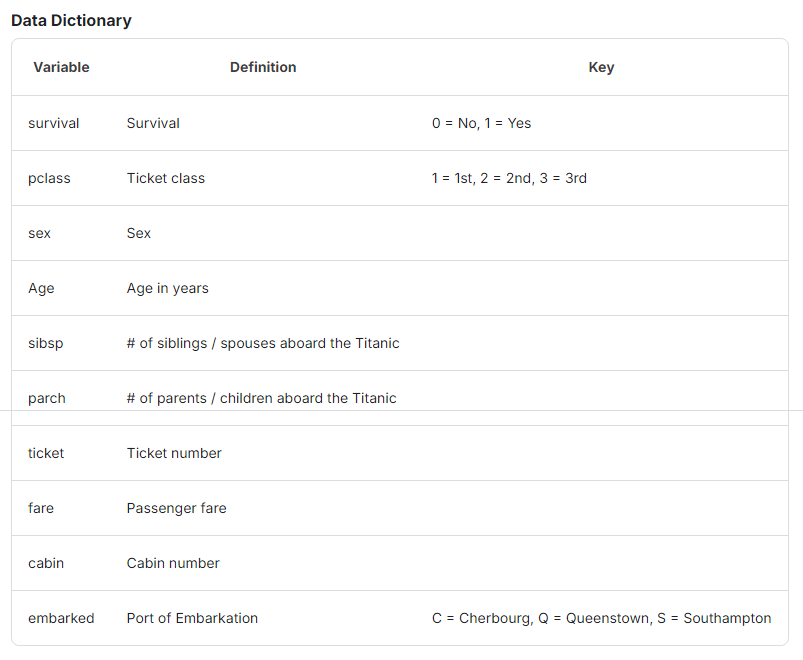

In [418]:
# 전처리 필요 (expect)

# 1. Age NaN data
# 2. cabin
# 3. Embarked

In [419]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [420]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [421]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [422]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.000,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.550,NaN,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.275,D36,C
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.000,NaN,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C


# EDA

## Sex

Survived
0    549
1    342
Name: count, dtype: int64


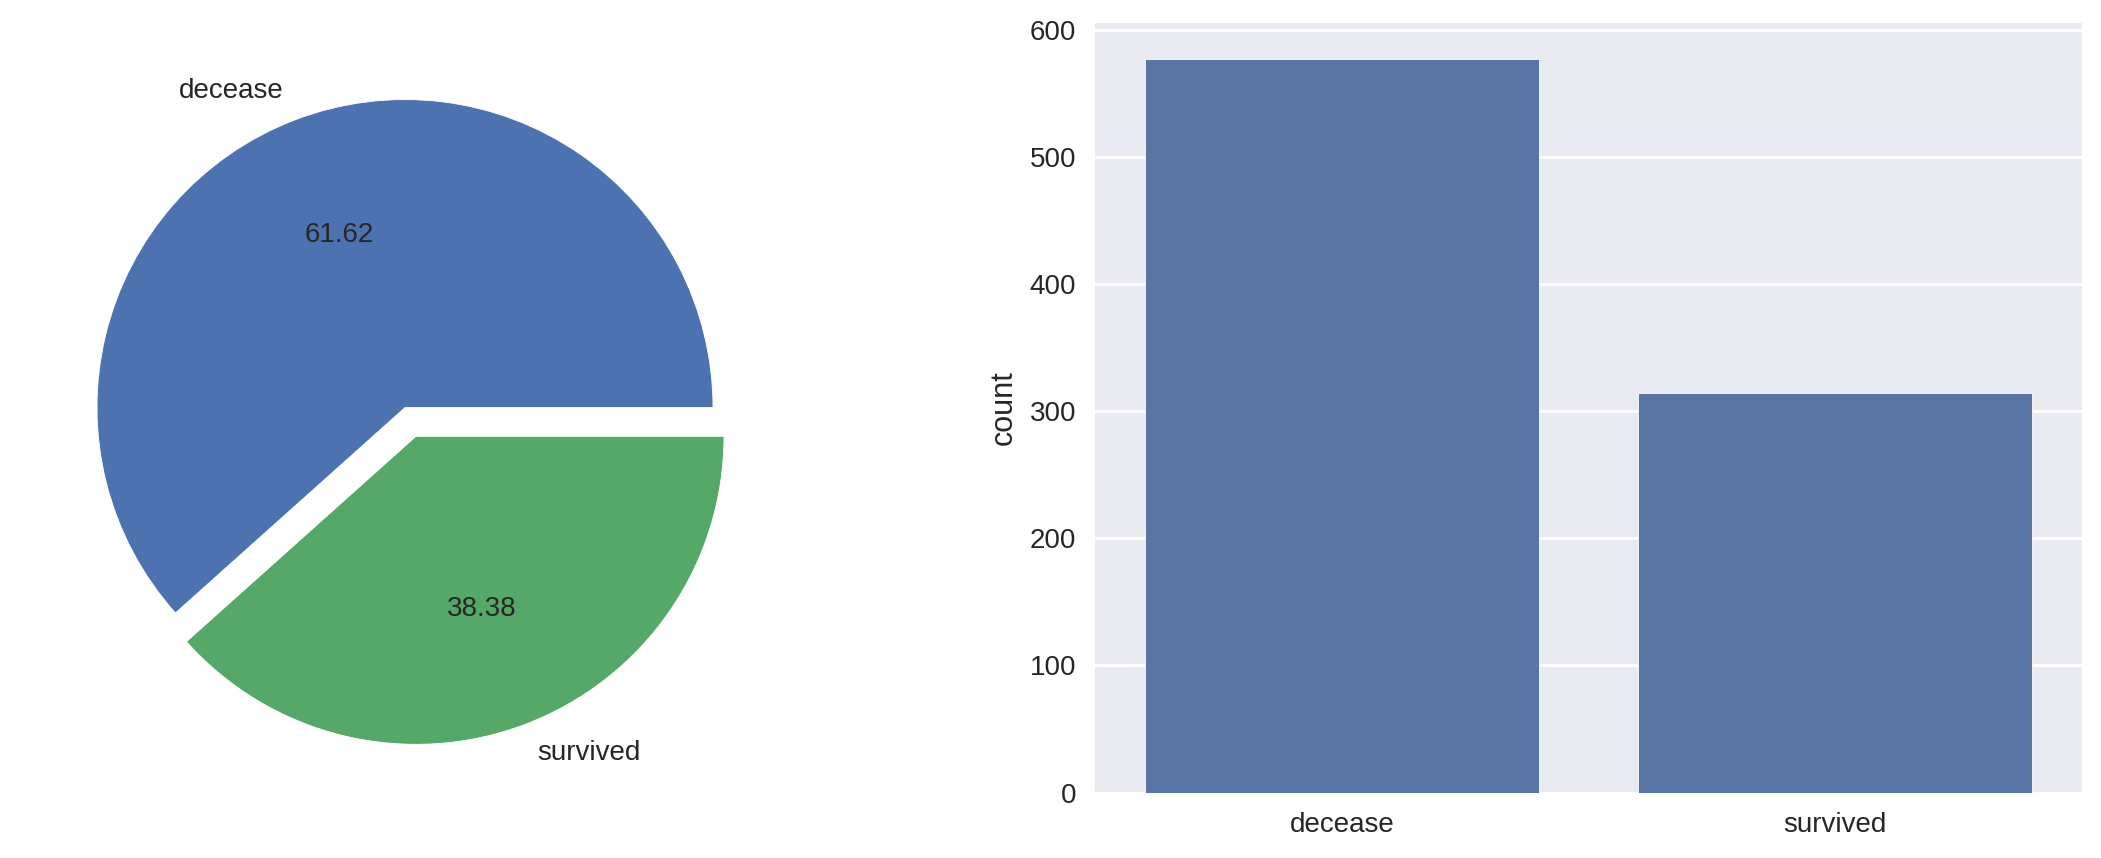

In [423]:
# visualization
# feature : Sex

# 전체 인원 중 사망, 생존 비율/숫자
plt.style.use('seaborn')

print(train['Survived'].value_counts())

fig, ax = plt.subplots(1, 2, figsize=(14,5))
labels = ['decease', 'survived']

# pie
train['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0, 0.1],
                                             autopct='%1.2f', labels=labels)
ax[0].set(ylabel='')

# Count
sns.countplot(data=train, x='Sex', ax=ax[1])
ax[1].set(xlabel='', xticklabels=labels)

plt.show()



In [424]:
# 전체 인원 비율/숫자

# 전체 인원중 생존자 남여 비율, 숫자

print(train['Sex'].value_counts())


# 사망자 남여비율, 숫자
print(train[train['Survived']==0]['Sex'].value_counts())

# 생존자 남여비율, 숫자
print(train[train['Survived']==1]['Sex'].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64
Sex
male      468
female     81
Name: count, dtype: int64
Sex
female    233
male      109
Name: count, dtype: int64


**인원 성별 - 사망/생존 정보**

- 전체 인원: 891명 (남자 557명, 여자 314명)
- 사망 인원: 549명 (남자 468명, 여자 81명)
- 생존 인원: 342명 (남자 107명, 여자 233명)

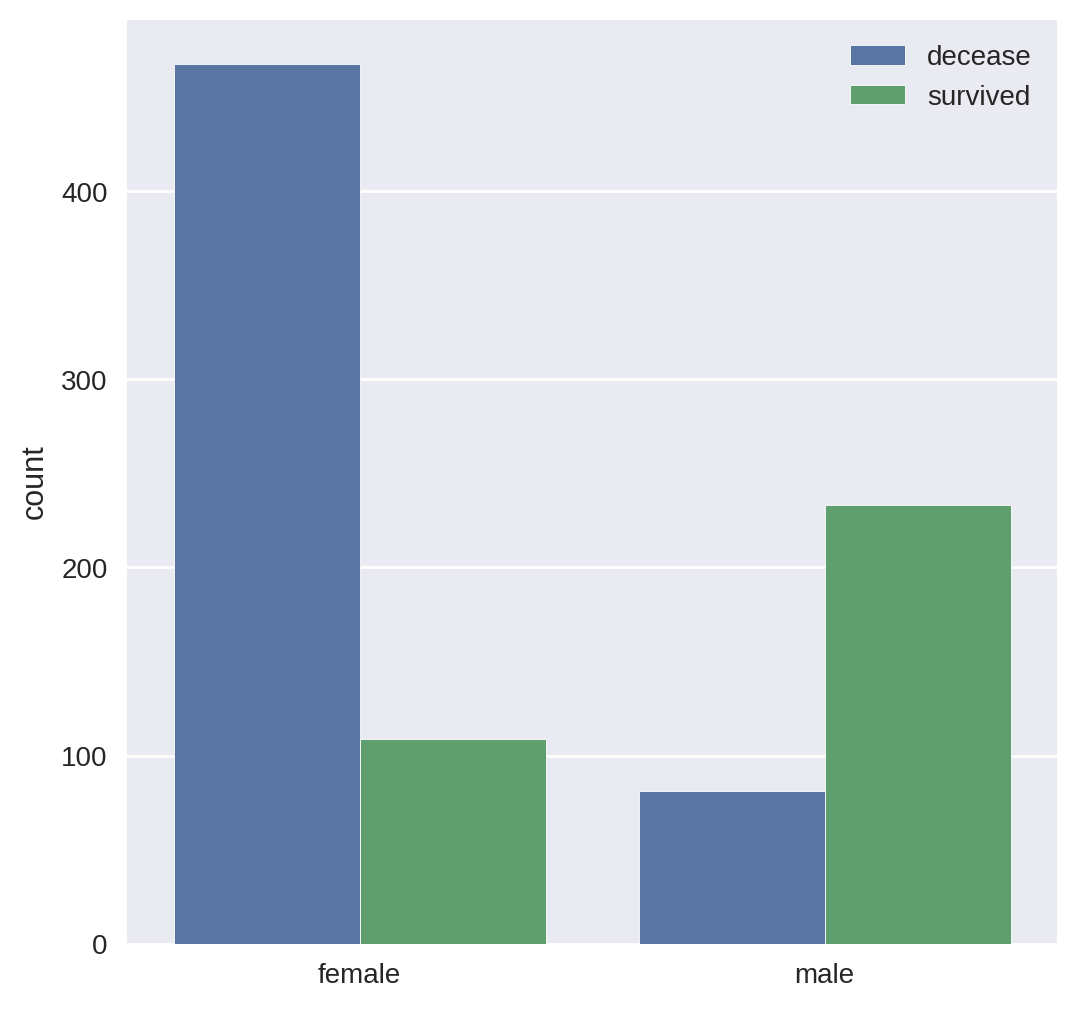

In [425]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train, x='Sex', hue='Survived', ax=ax)

ax.set(xticklabels=['female', 'male'], xlabel='')

ax.legend(labels=labels)

plt.show()

## Ticket Class / Fare

### Pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


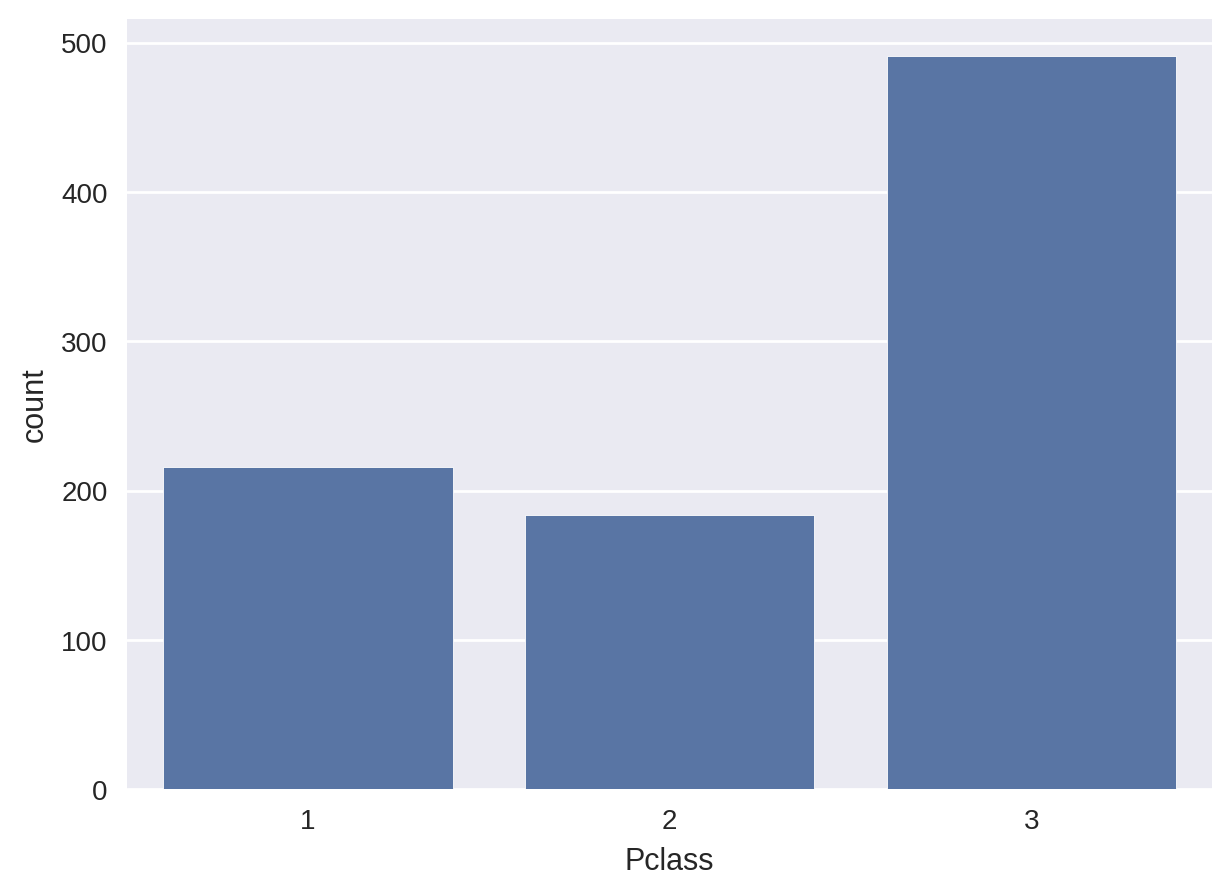

In [426]:
# feature : Pclass ( Ticket class )

print(train['Pclass'].value_counts())

fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data=train, x='Pclass', ax=ax)

plt.show()

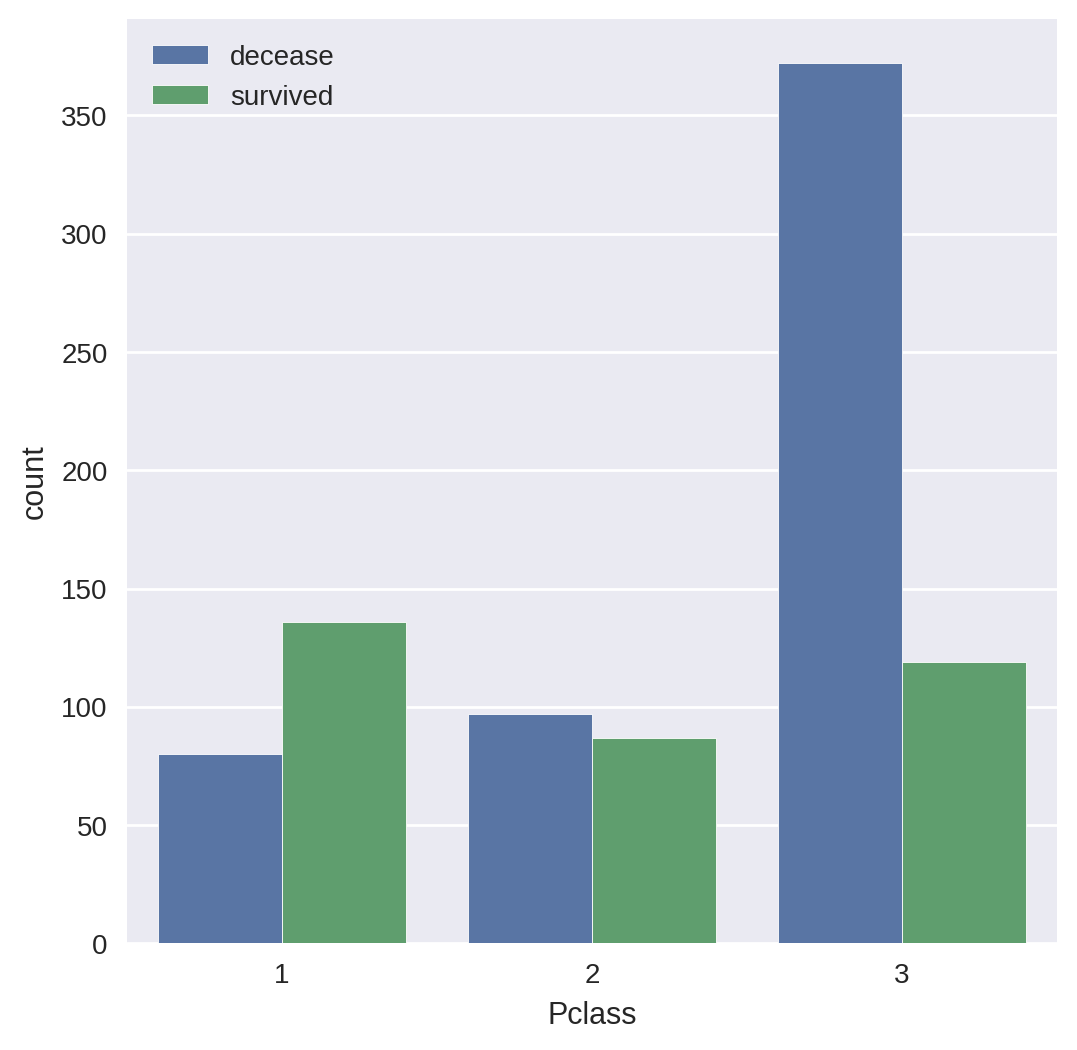

Pclass
3    372
2     97
1     80
Name: count, dtype: int64
Pclass
1    136
3    119
2     87
Name: count, dtype: int64


In [427]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax)
ax.legend(labels=labels)
plt.show()

# 사망자/생존자 Pclass 숫자
print(train[train['Survived']==0]['Pclass'].value_counts())
print(train[train['Survived']==1]['Pclass'].value_counts())

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Survived')]

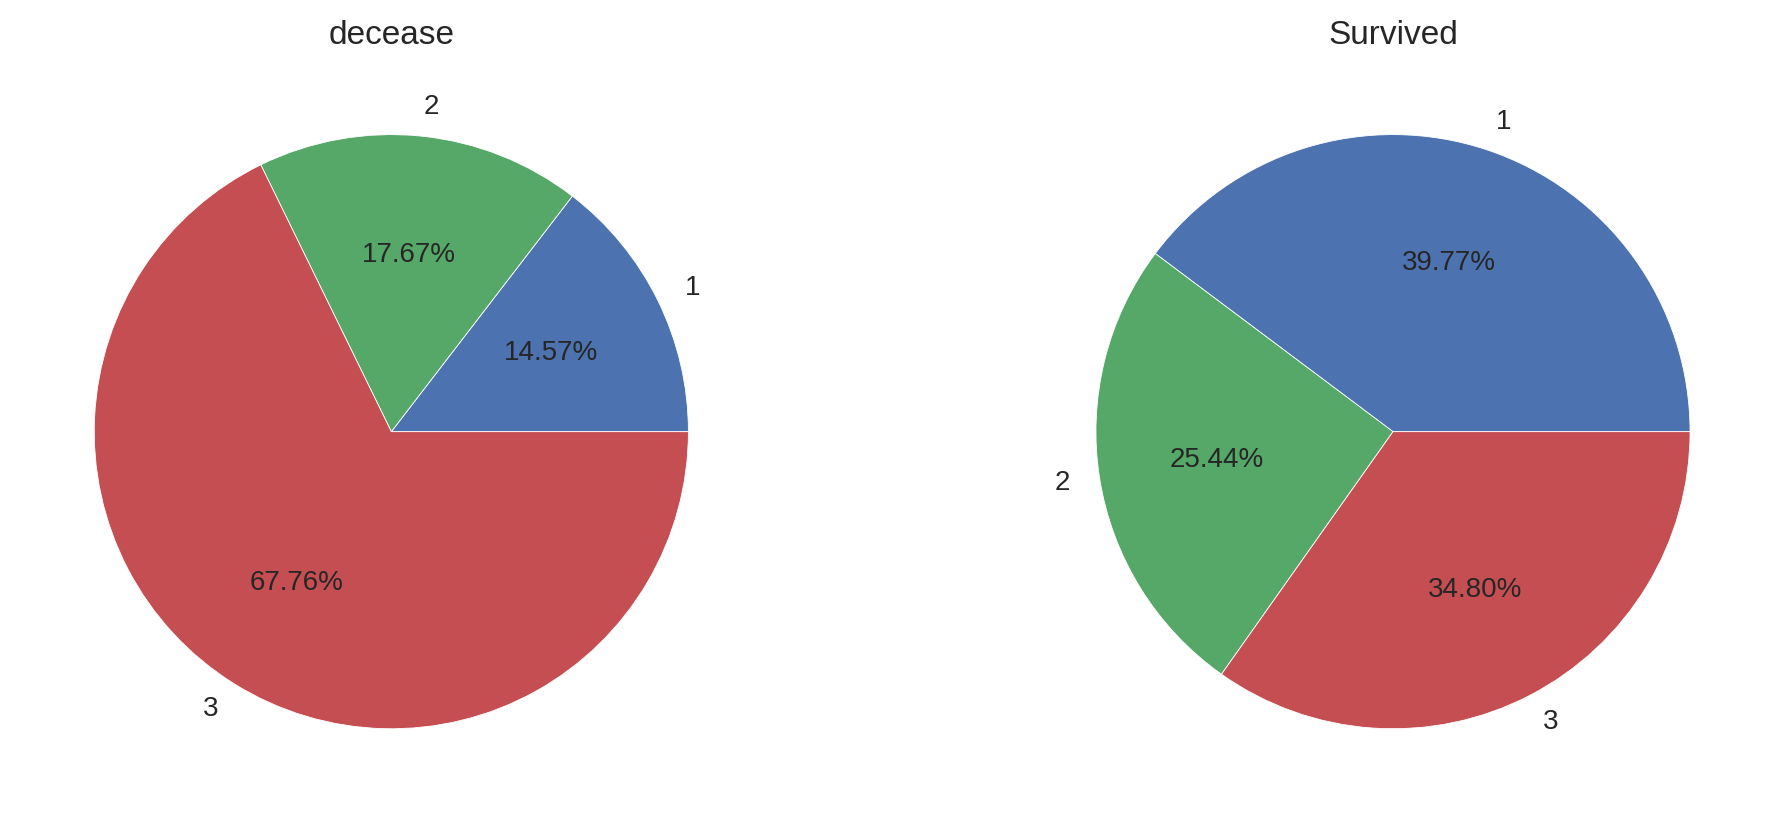

In [428]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

# decease
train[train['Survived']==0]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[0], autopct='%1.2f%%')
ax[0].set(ylabel='', title='decease')

# Survived
train[train['Survived']==1]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[1], autopct='%1.2f%%')
ax[1].set(ylabel='', title='Survived')


In [429]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**좌석 별 - 사망/생존 정보**

- 전체 인원 좌석배치
3:  491 /
1:    216 /
2:    184

- 사망 인원 별  좌석배치
3:    372 /
2:     97 /
1:     80

- 생존 인원 별 좌석배치
1:    136 /
3:    119 /
2:     87

- 좌석 별 사망율
3: 67.76% /
2: 17.67% /
1: 14.57% /

- 좌석 별 생존율
1: 39.77% /
2: 25.44% /
3: 34.80%

### Fare

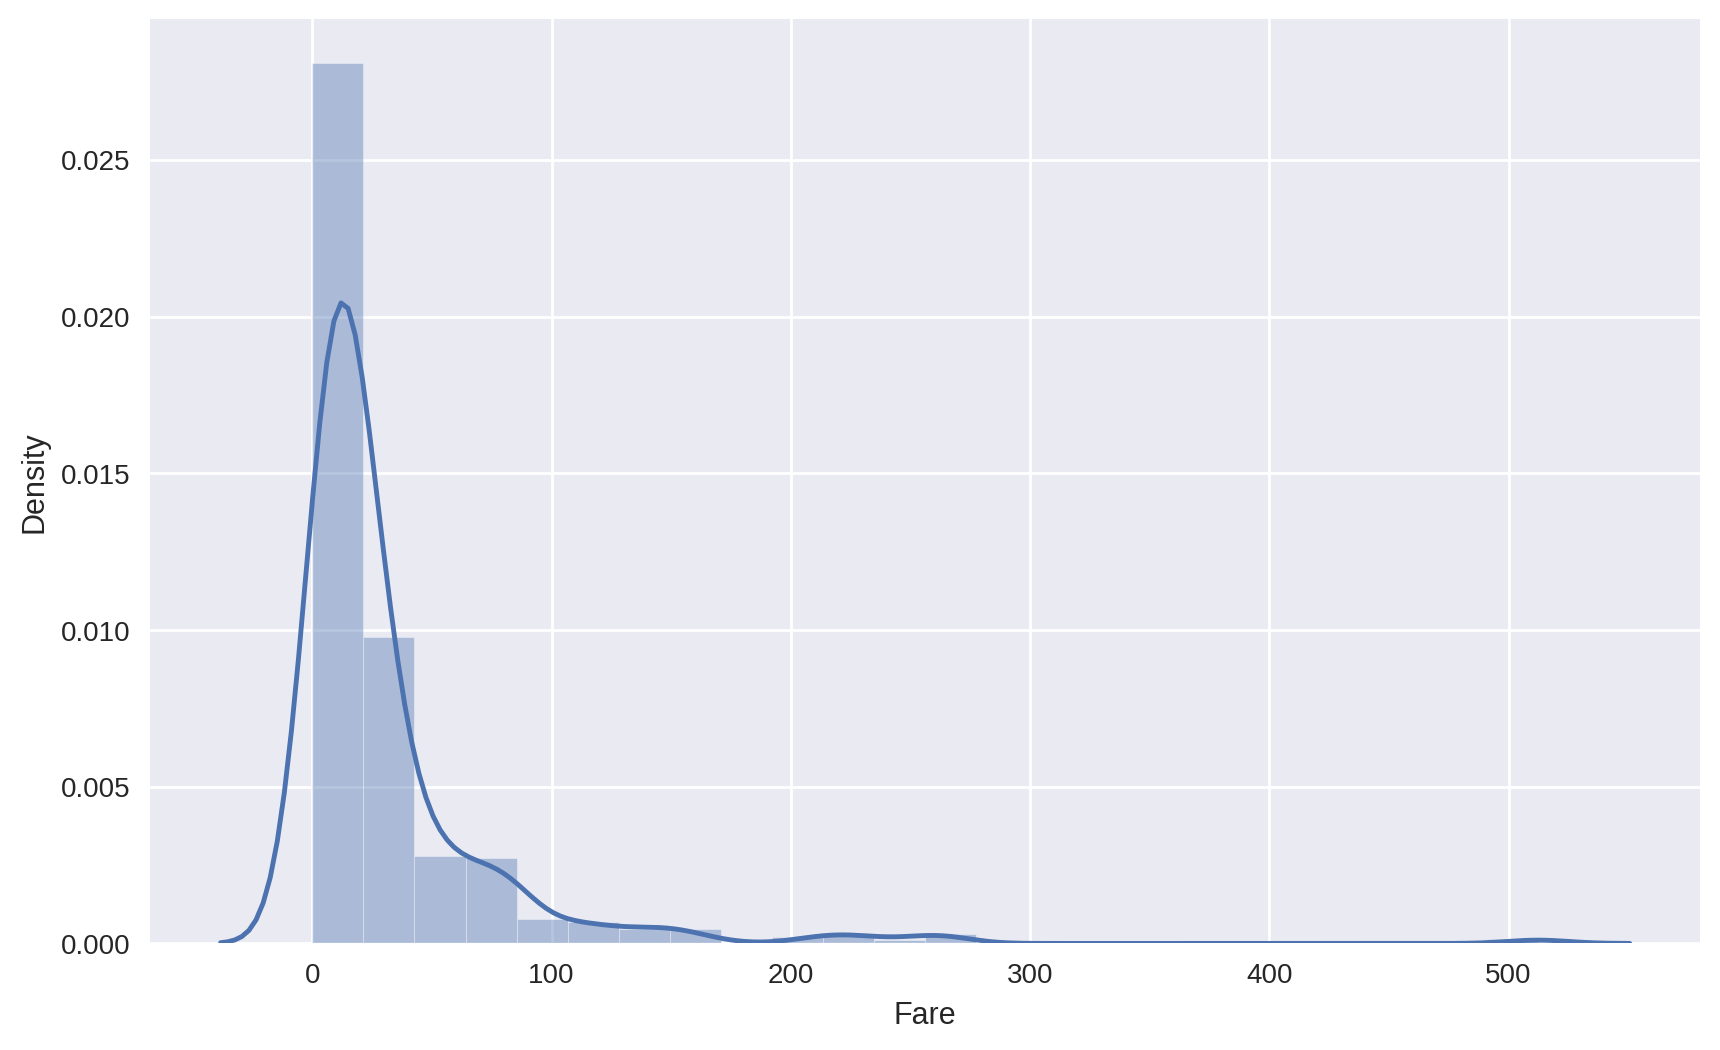

In [430]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(train['Fare'], bins=24, ax=ax)

plt.show()

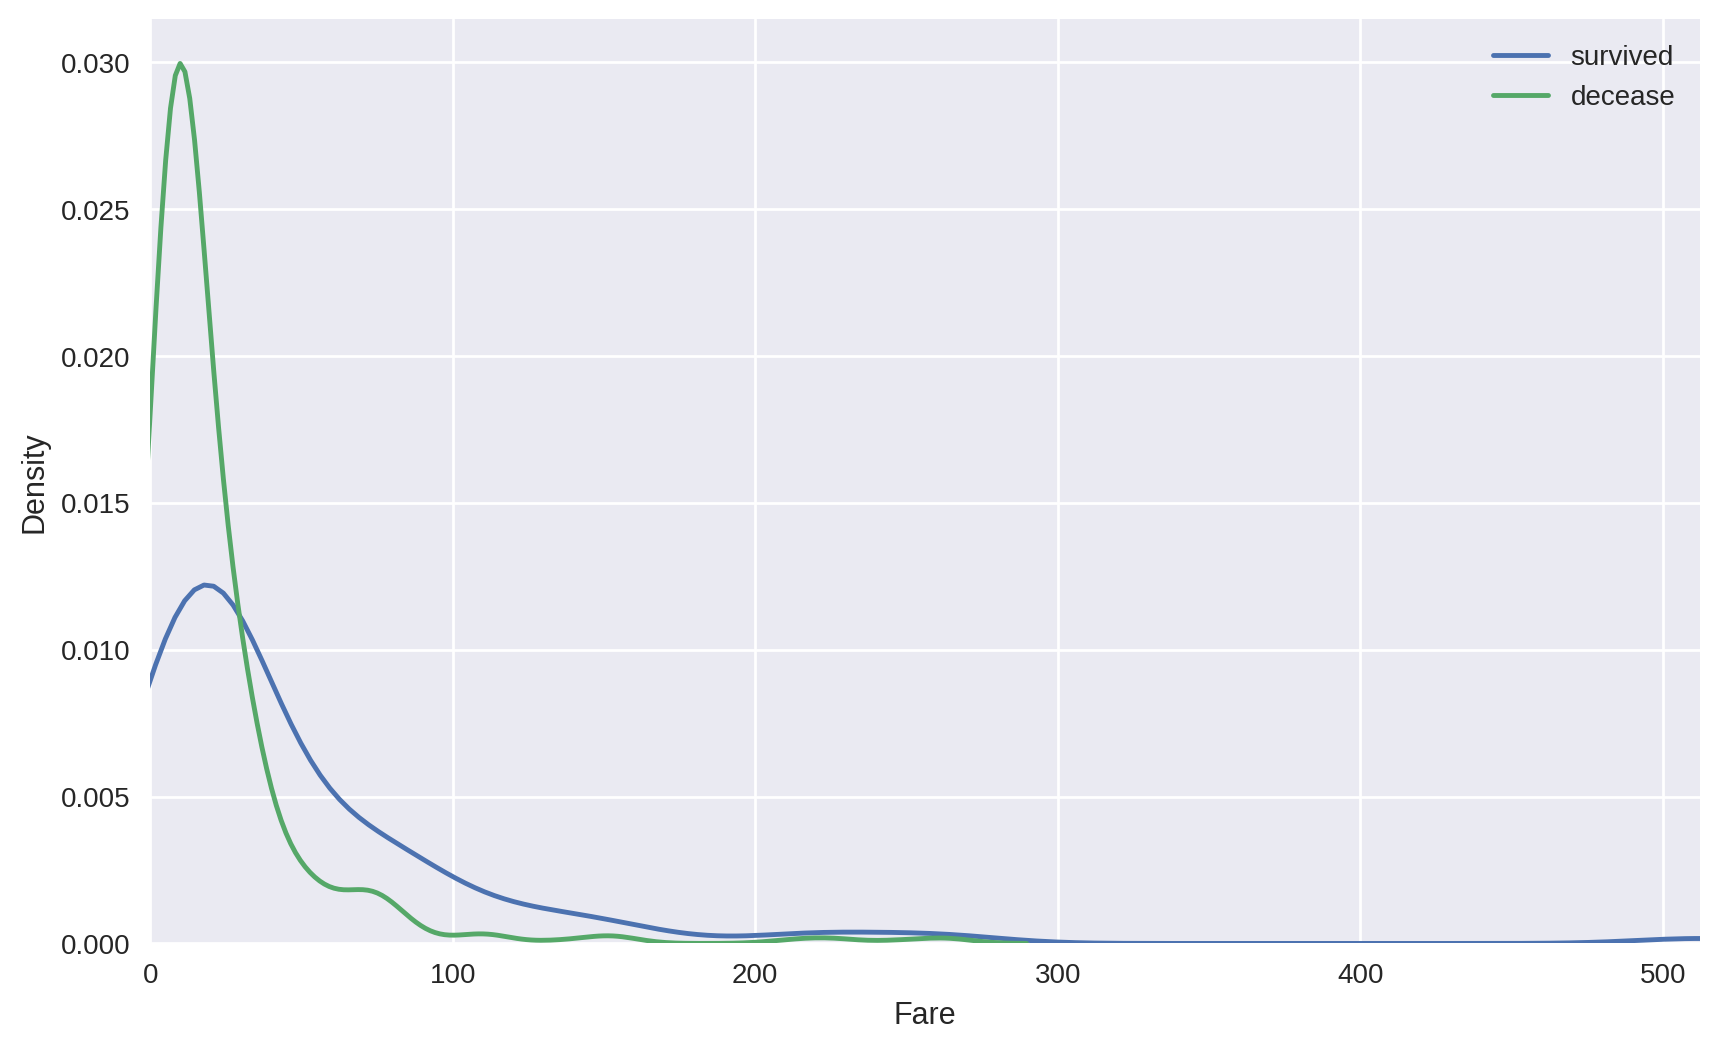

In [431]:
fig, ax = plt.subplots(figsize=(10,6))

# 분포 확인
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)

# 가장 높은 가격까지 범위 확대
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['survived', 'decease'])

plt.show()

- 3등석 탑승객의 사망자가 가장 많다

### Ticket

In [432]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [433]:
# 티켓 번호에 문자가 있는지 확인하는 새로운 열을 추가합니다.
train['Ticket_has_letter'] = train['Ticket'].str.contains('[A-Za-z]')

# 티켓 번호에 문자가 있는 승객만 선택합니다.
train_letters = train[train['Ticket_has_letter'] == True]

# 티켓 번호에 문자가 있는 승객의 생존율을 계산합니다.
survival_rate_letters = train_letters['Survived'].mean()

print(f"train.csv에서 영문이 포함된 티켓을 가진 승객의 생존율: {survival_rate_letters:.2f}")

train.csv에서 영문이 포함된 티켓을 가진 승객의 생존율: 0.38


## Family

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
##################################################
SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64
SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
##################################################
Percentage of SibSp = 0 survived:  34.53947368421053
Percentage of SibSp = 1 survived:  53.588516746411486
Percentage of SibSp = 2 survived:  46.42857142857143
Percentage of SibSp = 3 survived:  25.0
Percentage of SibSp = 4 survived:  16.666666666666664


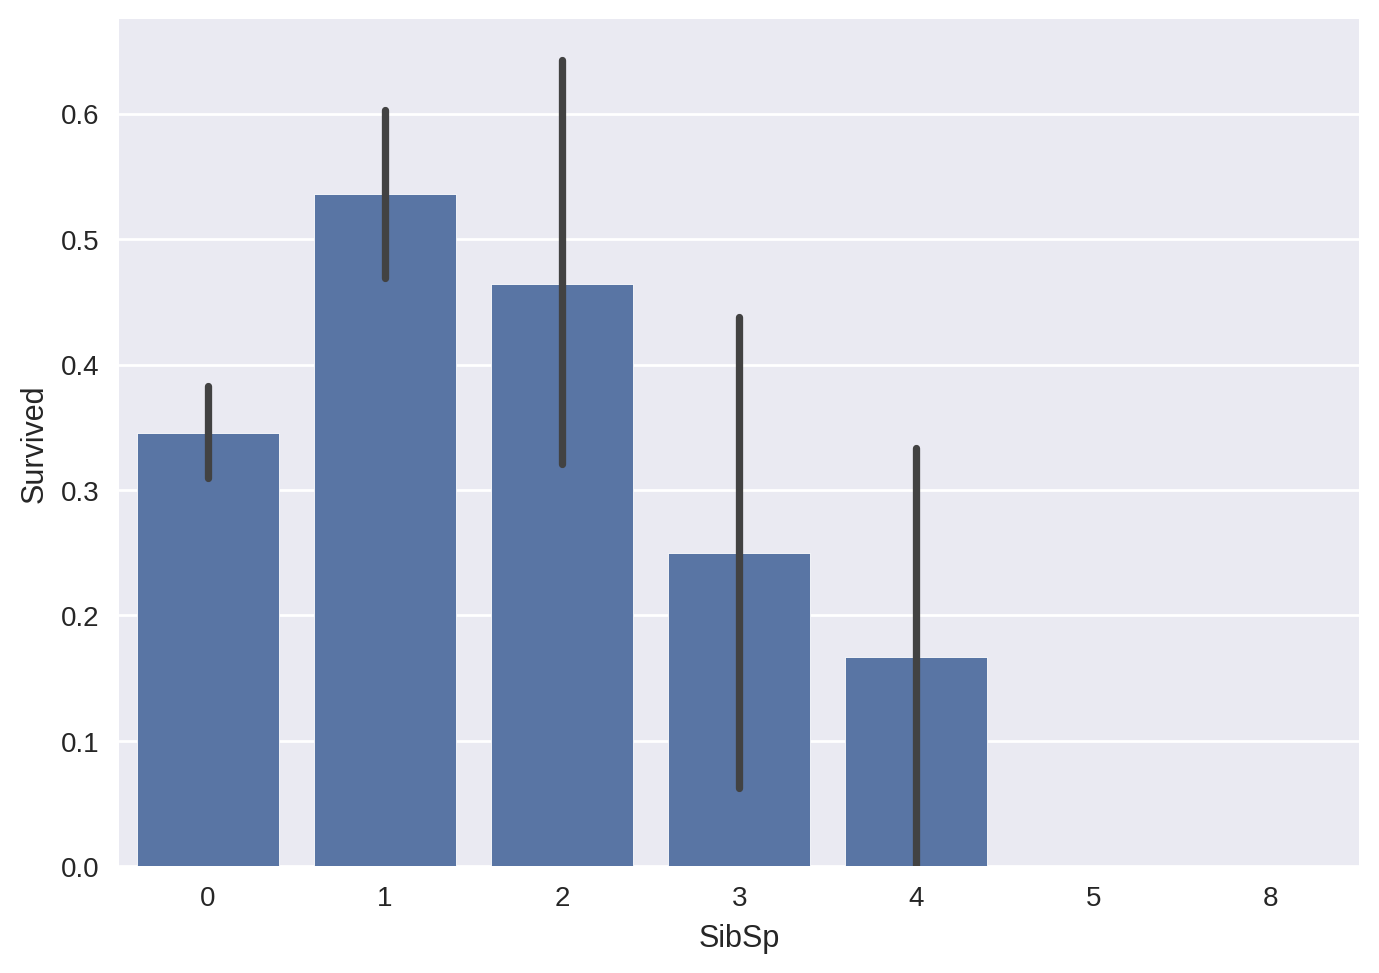

In [434]:
# feature : SibSp ( siblings / spouses aboard the Titanic )
# 동반한 형재 자매 또는 배우자 수

sns.barplot(x="SibSp", y="Survived", data=train)

print(train['SibSp'].value_counts())

print('#'*50)

print(train[train['Survived']==0]['SibSp'].value_counts())
print(train[train['Survived']==1]['SibSp'].value_counts())


print('#'*50)


print("Percentage of SibSp = 0 survived: ", train['Survived'][train["SibSp"] == 0].value_counts(normalize=True)[1]*100)
print("Percentage of SibSp = 1 survived: ", train['Survived'][train["SibSp"] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of SibSp = 2 survived: ", train['Survived'][train["SibSp"] == 2].value_counts(normalize=True)[1]*100)
print("Percentage of SibSp = 3 survived: ", train['Survived'][train["SibSp"] == 3].value_counts(normalize=True)[1]*100)
print("Percentage of SibSp = 4 survived: ", train['Survived'][train["SibSp"] == 4].value_counts(normalize=True)[1]*100)

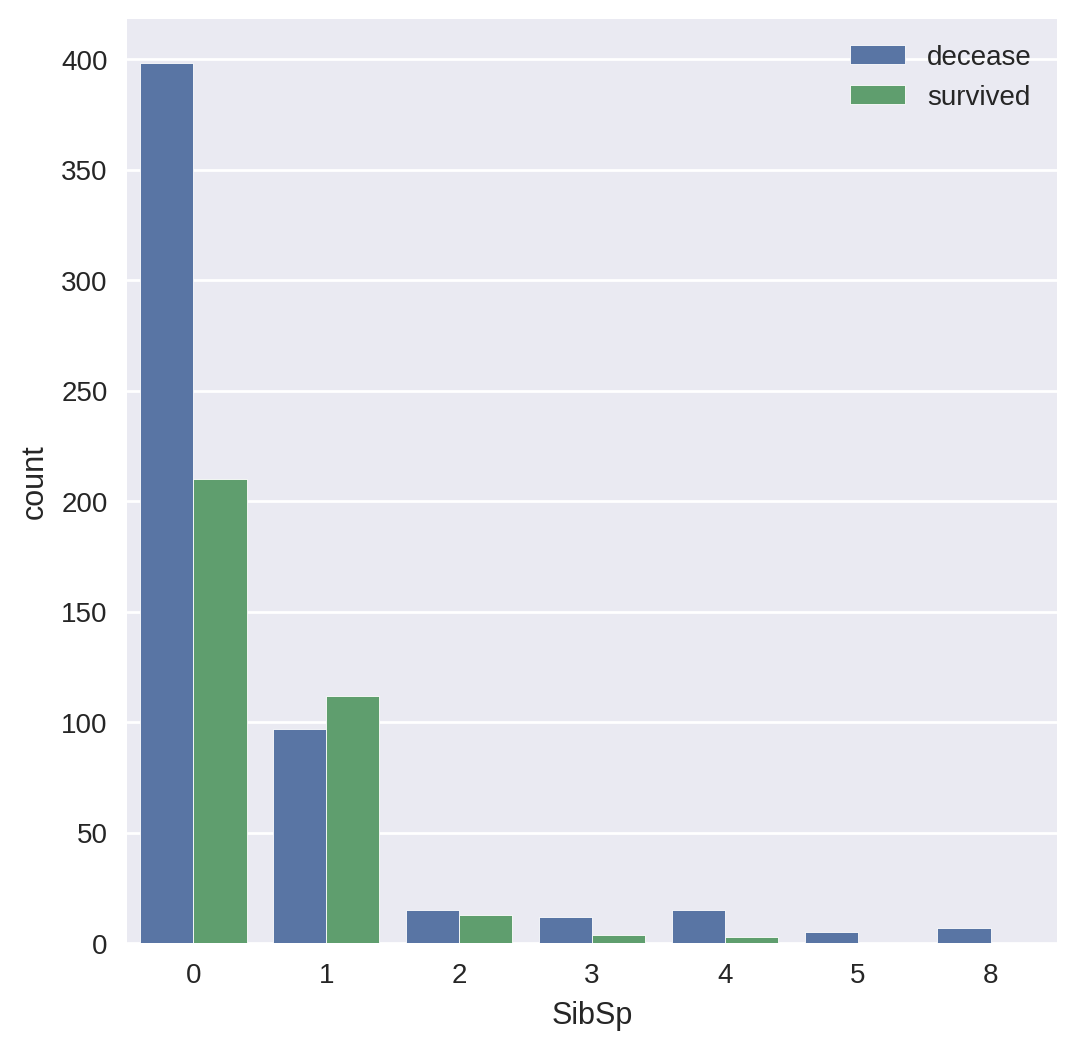

In [435]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax)
ax.legend(labels=labels)
plt.show()

**형제자매 동승**

- 전체인원
0:   608
1:   209
2:   28
4:    18
3:    16
8:     7
5:     5

- 사망인원
0:    398
1:    97
4:     15
2:     15
3:     12
8:      7
5:      5

- 생존인원
0:    210
1:    112
2:     13
3:      4
4:      3



- 생존율이 제일 높은 그룹 : 형재자매동승 1, 2명까지 (50%)
- 혼자 탄 사람(동승 0)의 생존자 수가 제일 많음

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
##################################################
Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64
Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
##################################################


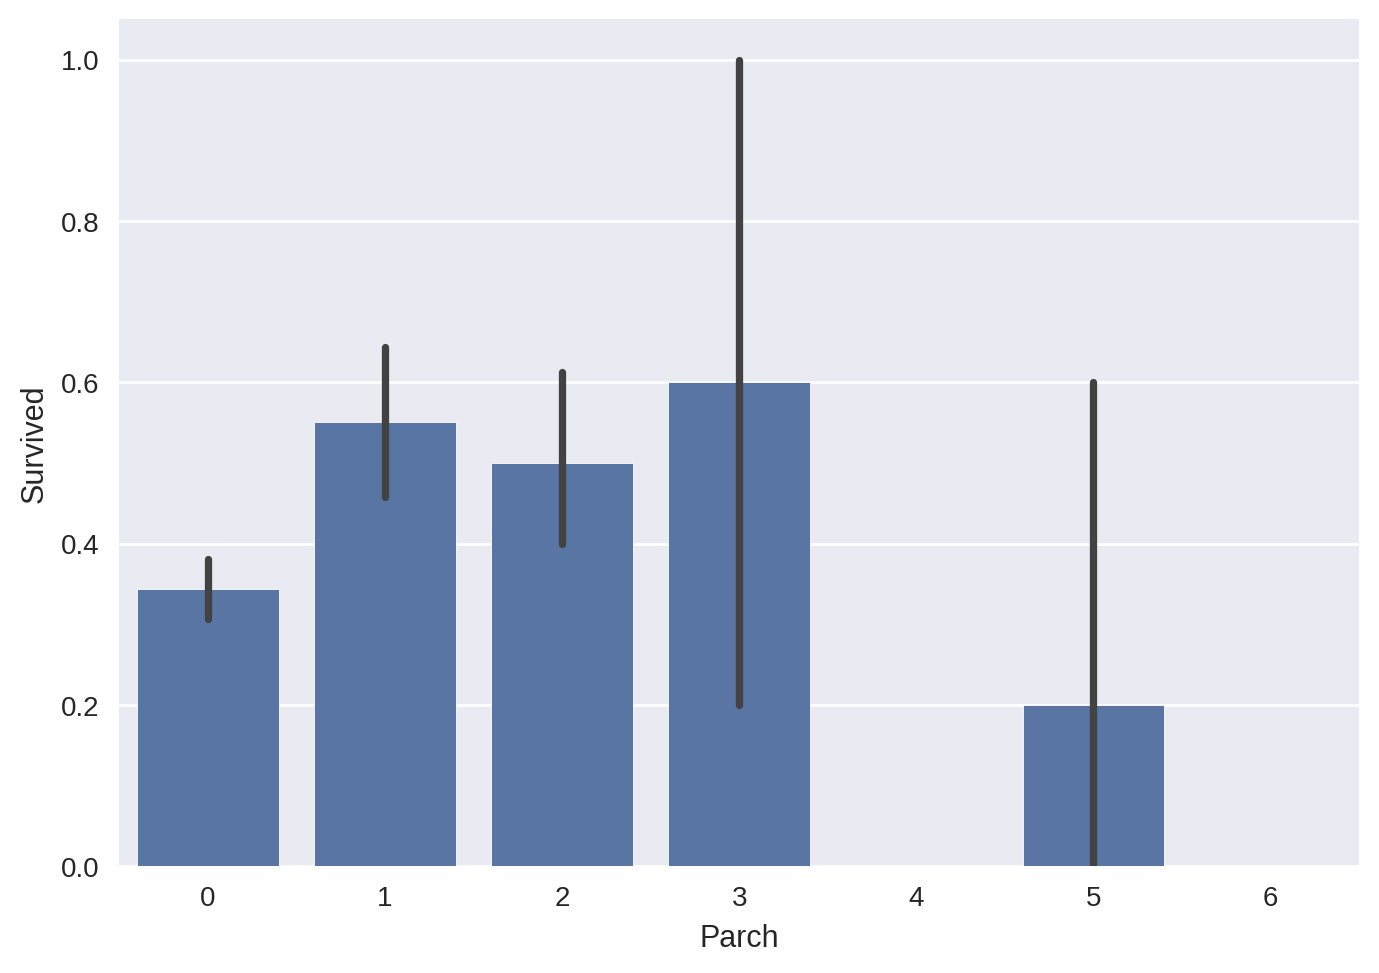

In [436]:
# Feature : Parch (Parent or Child)


print(train['Parch'].value_counts())

print('#'*50)

print(train[train['Survived']==0]['Parch'].value_counts())
print(train[train['Survived']==1]['Parch'].value_counts())


print('#'*50)


sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

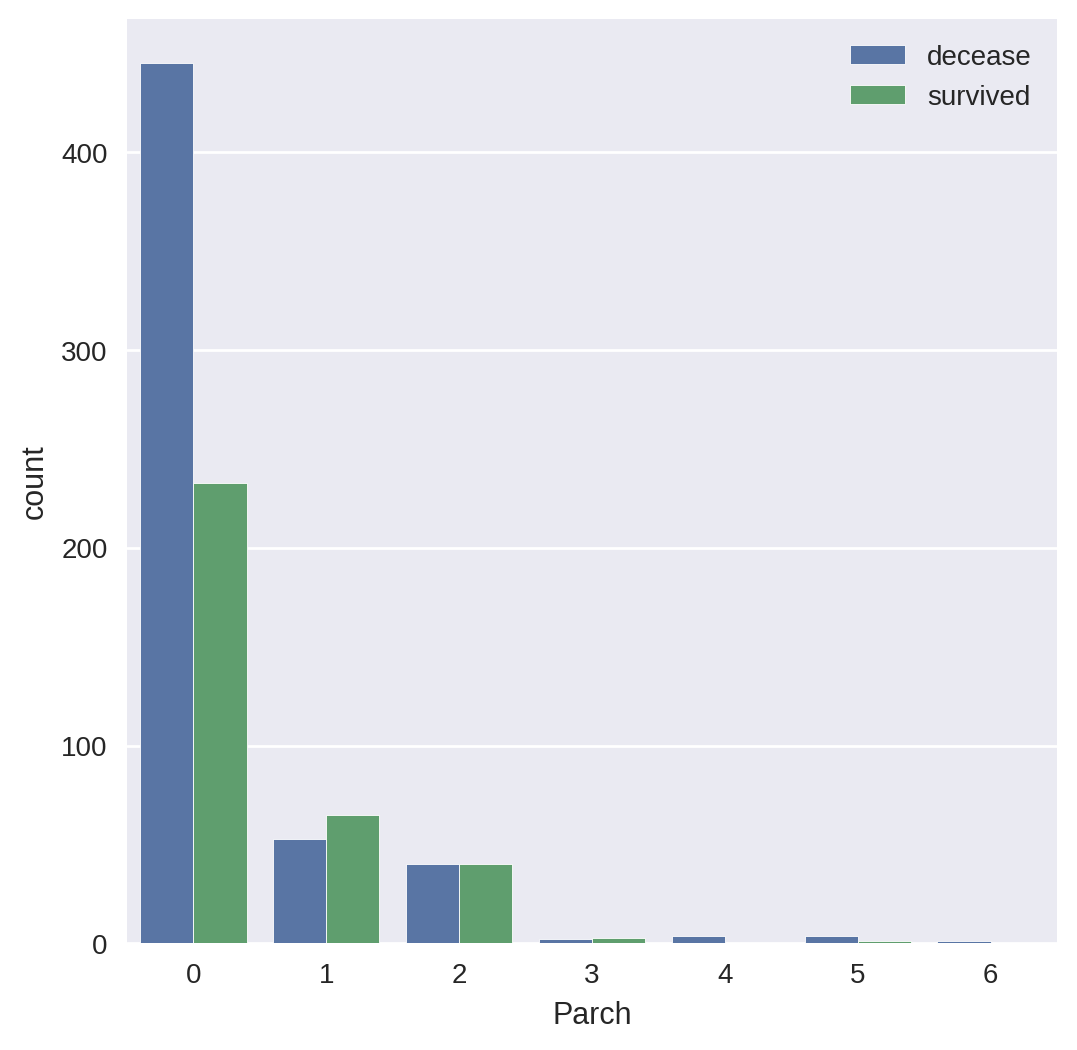

In [437]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train, x='Parch', hue='Survived', ax=ax)
ax.legend(labels=labels)
plt.show()

**부모자녀 동승**

- 전체인원
0:    678
1:    118
2:     80
5:      5
3:      5
4:      4
6:      1

- 사망인원
0:    445
1:    53
2:     40
5:      4
4:      4
3:      2
6:      1

- 생존인원
0:    233
1:     65
2:     40
3:      3
5:      1




- 생존율이 제일 높은 그룹 : 부모자녀동승 1, 2, 3명까지 (50%)
- 혼자 탄 사람(동승 0)의 생존자 수가 제일 많음

- SibSp & Parch는 유사한 특성으로 합쳐서 feature활용 가능

## Age

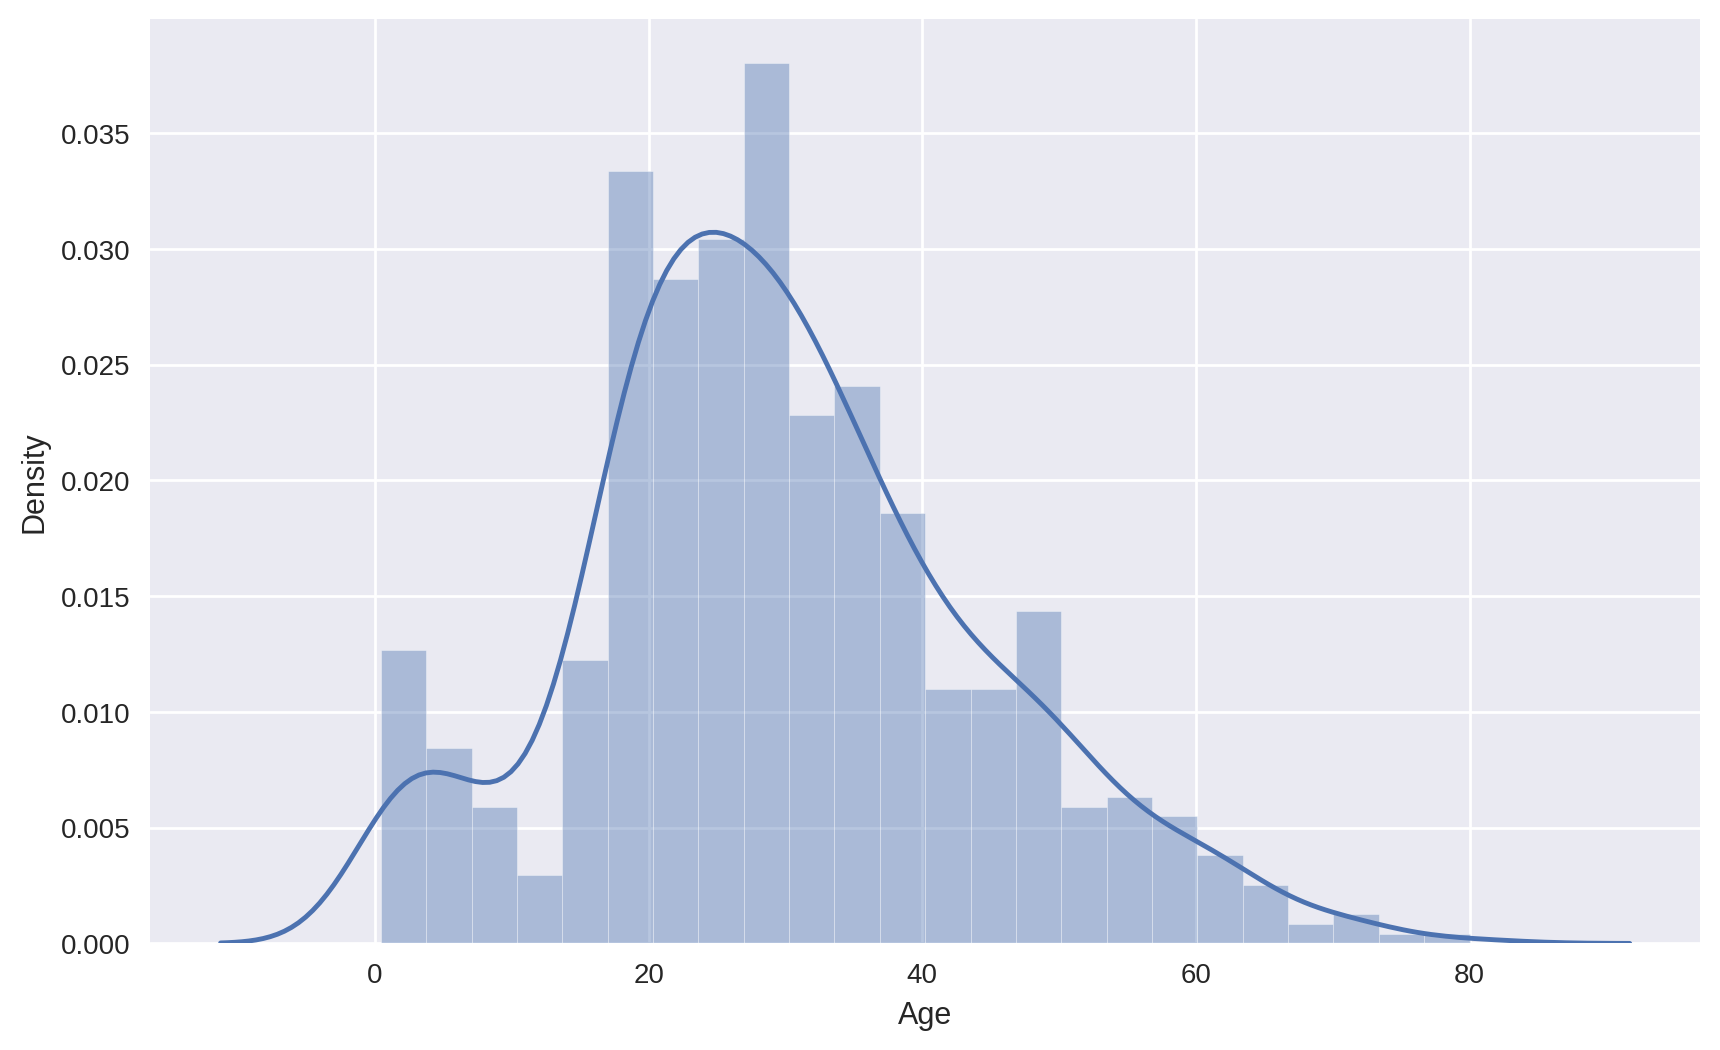

In [438]:
# Feature : Age

# 전체 탑승인원 연령대 확인

fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(train['Age'], bins=24, ax=ax)

plt.show()

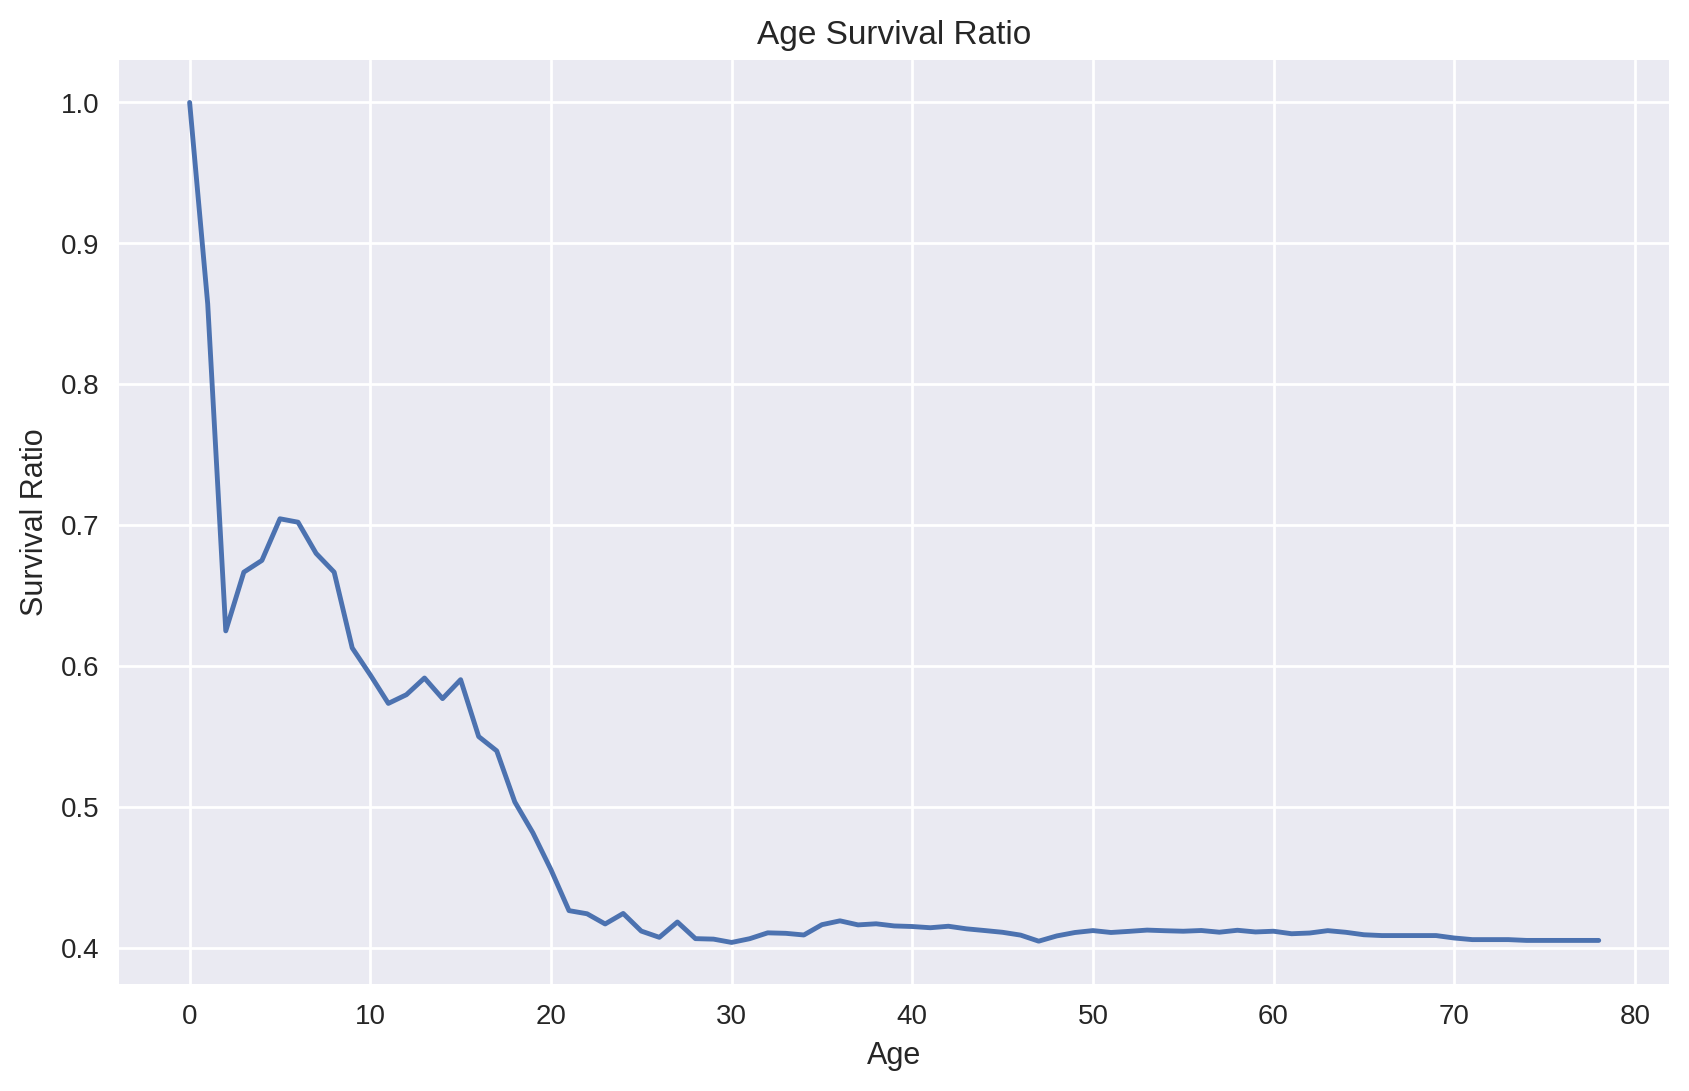

In [439]:
# 나이별 생존율 구하기

age_survival_ratio = []

# 1살부터 80까지
for i in range(1, 80) :
    age_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))

plt.figure(figsize=(10,6))
plt.plot(age_survival_ratio)
plt.title('Age Survival Ratio')
plt.xlabel('Age')
plt.ylabel('Survival Ratio')
plt.show()


**나이별 생존율**
- 탑승객은 20-40대가 가장 많음
- 20대 미만의 생존율이 두드러지게 높음


[따라하](https://mintaewon.github.io/2020/12/kaggle-titanic-%EC%83%9D%EC%A1%B4%EC%9E%90-%EC%98%88%EC%B8%A1-1-eda/)

## Embarked

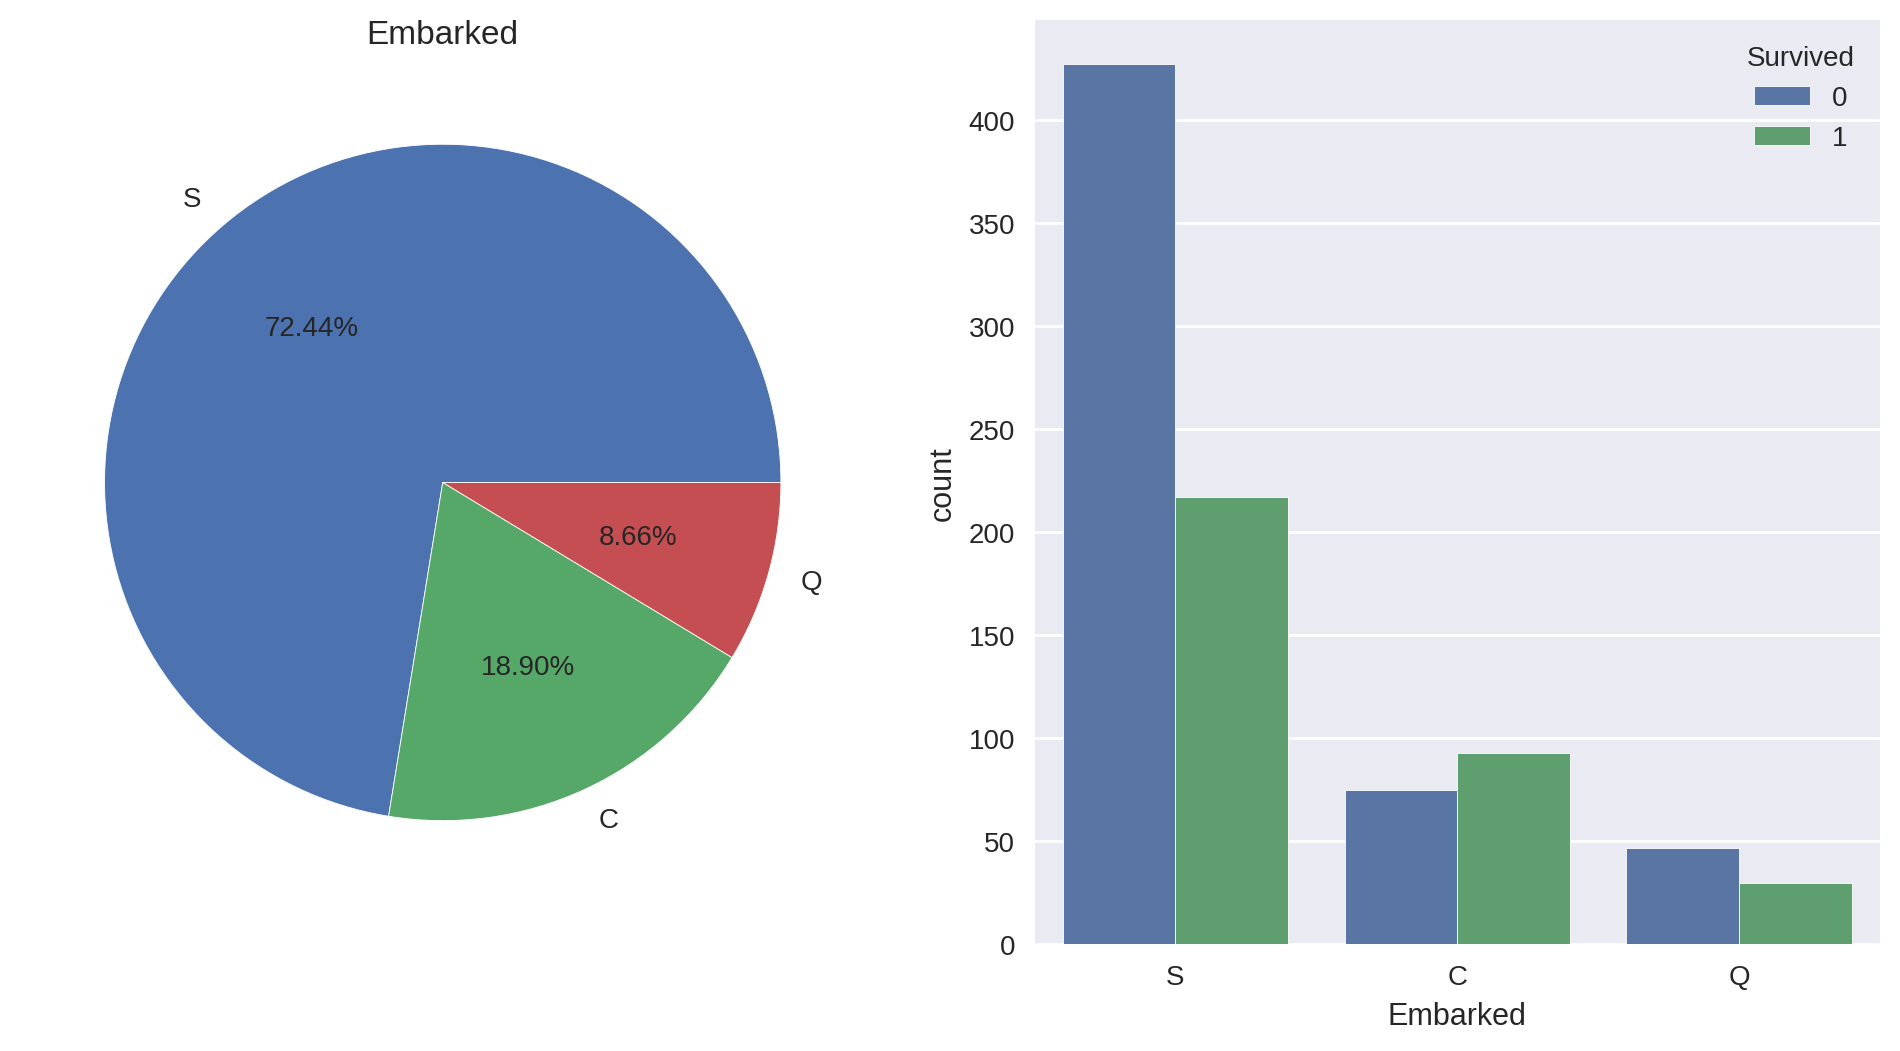

In [440]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

train['Embarked'].value_counts().plot.pie(ax=ax[0], autopct='%1.2f%%')
ax[0].set(title='Embarked', ylabel='')

sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax[1])
plt.show()

In [441]:
# 항구별 생존율

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


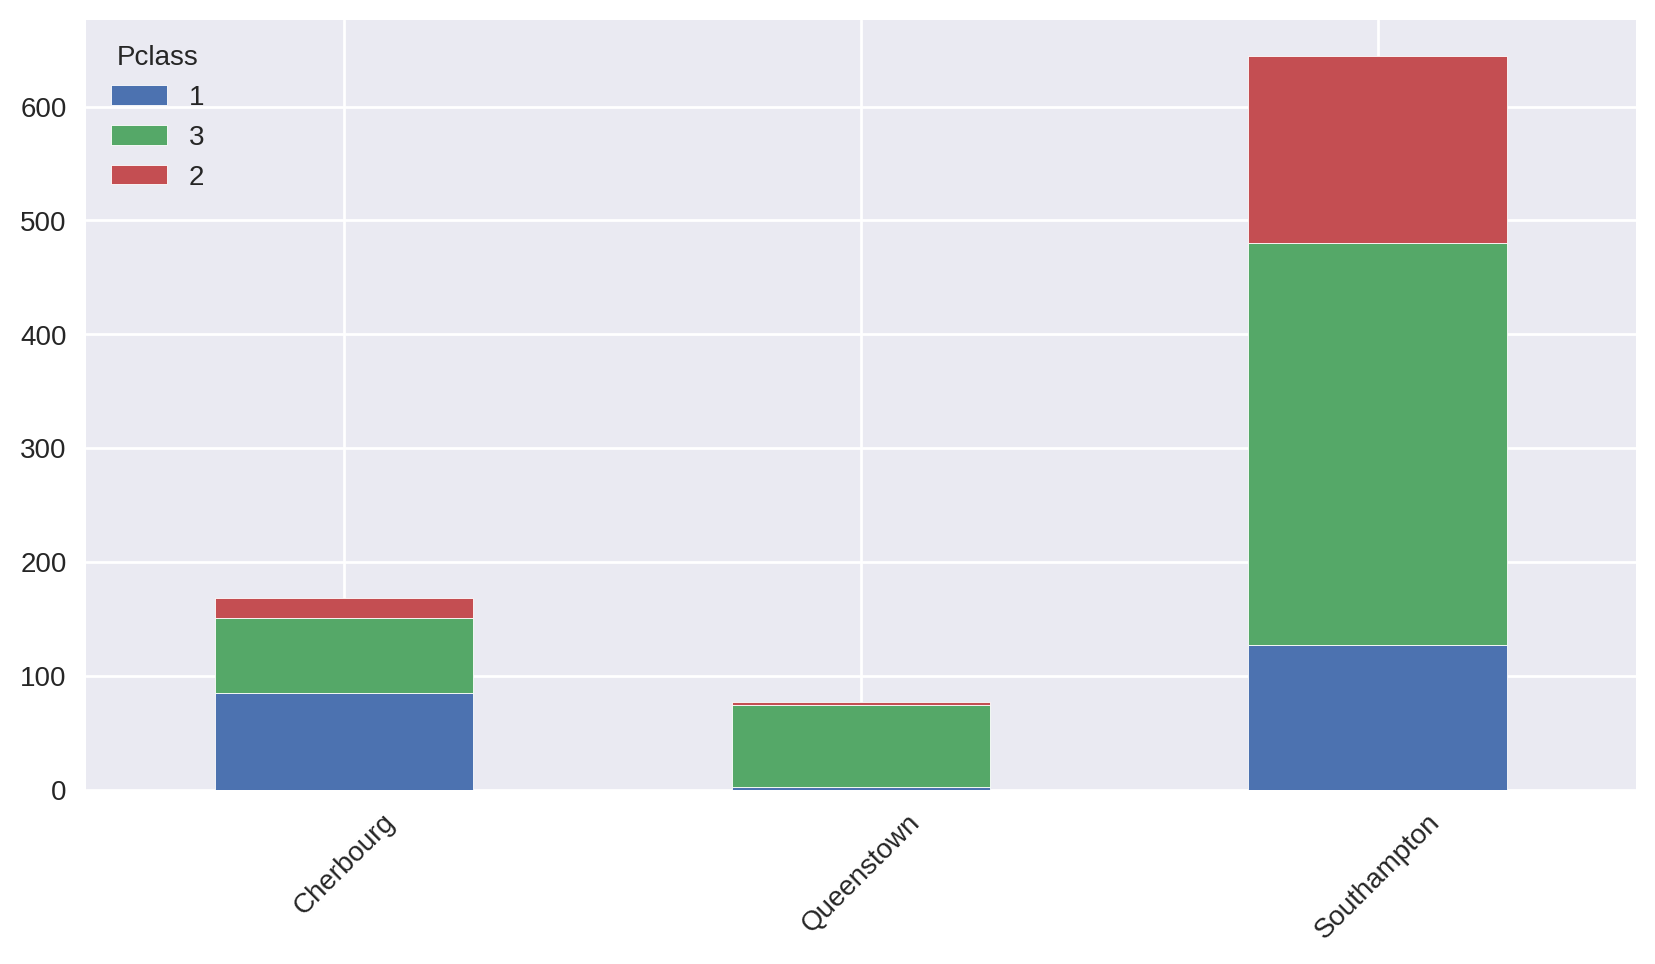

In [442]:
# 항구마다 탑승객의 클래스가 다른가?

Pclass1 = train[train['Embarked'] == 'C']['Pclass'].value_counts()
Pclass2 = train[train['Embarked'] == 'Q']['Pclass'].value_counts()
Pclass3 = train[train['Embarked'] == 'S']['Pclass'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Cherbourg', 'Queenstown', 'Southampton']
df.plot(kind='bar', stacked=True, figsize=(10,5))

plt.xticks(rotation=45)
plt.show()

- S항구 탑승객은 사망자가 많다.
- S항구 탑승객은 3클래스가 많다.

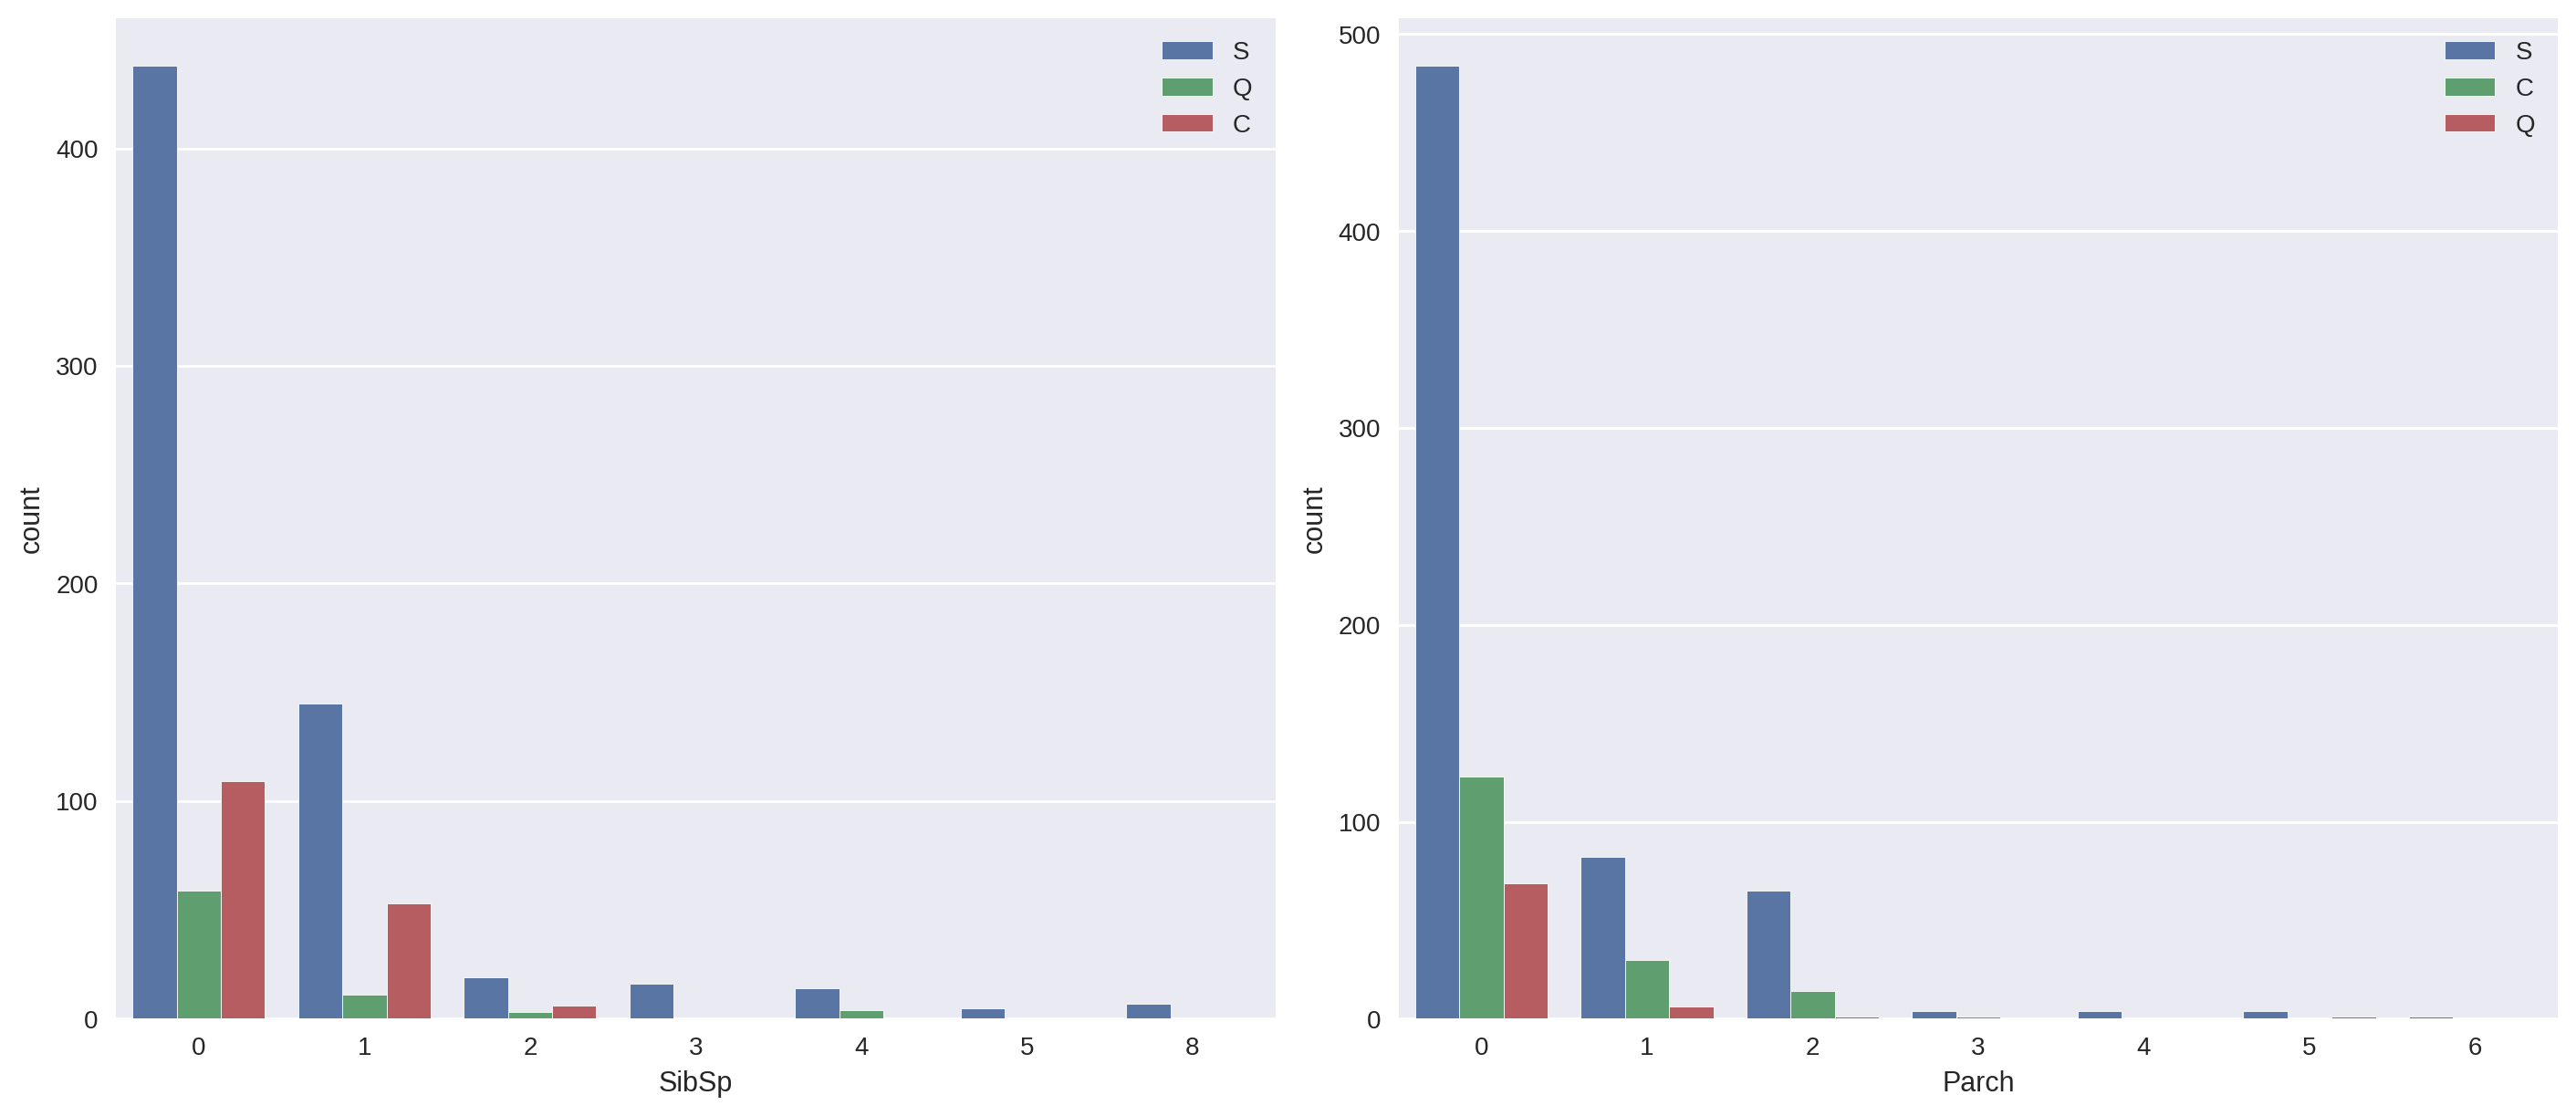

In [443]:
fig, ax = plt.subplots(1, 2, figsize=(14,6), constrained_layout=True)

sns.countplot(data=train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=ax[1])

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

- S항구에서 solo 3class 탑승객은 사망률이 높다

### Summary

|      Attribute      | Important |            Action           |
|:-------------------:|:---------:|:---------------------------:|
|     PassengerId     |     No    |           Discard           |
|         Sex         |    Yes    |            Encode           |
|         Age         |    Yes    |        Bin and Encode       |
| Port of Embarkation |    Yes    |           -           |
|        Pclass       |    Yes    |              -              |
|         Fare        |    Yes    |        Bin and Encode       |
|   SibSp and Parch   |    Yes    |     Engineer 'Relatives'    |
|         Name        |    Yes    | Engineer 'Title' and Encode |
|        Cabin        |     No    |           Discard           |
|        Ticket       |    Yes    |  Engineer 'Family_Survival' |


# PRE :

In [444]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  Ticket_has_letter  891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB


In [445]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1-1. 불필요한 열 제거: PassengerId, Cabin, Ticket_has_letter

train.drop(['Cabin'], axis=1, inplace=True)

In [446]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Embarked           889 non-null    object 
 11  Ticket_has_letter  891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [447]:
# 1-2. Age 열의 NaN 값 채우기: 평균 나이로 채우기
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [448]:
# 1-3. embarked NaN 값 채우기: 최빈값으로 채우기

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [449]:
# 2. Sex 열 인코딩: LabelEncoder 사용
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

In [450]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_has_letter
615,616,1,2,"Herman, Miss. Alice",0,24.000000,1,2,220845,65.0000,S,False
592,593,0,3,"Elsbury, Mr. William James",1,47.000000,0,0,A/5 3902,7.2500,S,True
757,758,0,2,"Bailey, Mr. Percy Andrew",1,18.000000,0,0,29108,11.5000,S,False
274,275,1,3,"Healy, Miss. Hanora ""Nora""",0,29.699118,0,0,370375,7.7500,Q,False
483,484,1,3,"Turkula, Mrs. (Hedwig)",0,63.000000,0,0,4134,9.5875,S,False


In [451]:
# 3. Age열 범주화 / on-hot encoding

train['Age'] = pd.cut(train['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80],
                      labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

train = pd.get_dummies(train, columns=['Age'], prefix='Age')

In [452]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Ticket_has_letter,Age_0-10,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80
476,477,0,2,"Renouf, Mr. Peter Henry",1,1,0,31027,21.0000,S,False,False,False,False,True,False,False,False,False
362,363,0,3,"Barbara, Mrs. (Catherine David)",0,0,1,2691,14.4542,C,False,False,False,False,False,True,False,False,False
70,71,0,2,"Jenkin, Mr. Stephen Curnow",1,0,0,C.A. 33111,10.5000,S,True,False,False,False,True,False,False,False,False
482,483,0,3,"Rouse, Mr. Richard Henry",1,0,0,A/5 3594,8.0500,S,True,False,False,False,False,True,False,False,False
424,425,0,3,"Rosblom, Mr. Viktor Richard",1,1,1,370129,20.2125,S,False,False,True,False,False,False,False,False,False


In [453]:
# 4. Fare 열 범주화 및 인코딩: 요금을 범주형 변수로 변환 후 one-hot encoding

train['Fare'] = pd.qcut(train['Fare'], q=8, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])
train = pd.get_dummies(train, columns=['Fare'], prefix='Fare')

In [454]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Ticket_has_letter,...,Age_60-70,Age_70-80,Fare_Q1,Fare_Q2,Fare_Q3,Fare_Q4,Fare_Q5,Fare_Q6,Fare_Q7,Fare_Q8
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",0,1,0,113806,S,False,...,False,False,False,False,False,False,False,False,True,False
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",0,0,0,248733,S,False,...,False,False,False,False,False,True,False,False,False,False
355,356,0,3,"Vanden Steen, Mr. Leo Peter",1,0,0,345783,S,False,...,False,False,False,False,True,False,False,False,False,False
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",0,0,1,250644,S,False,...,False,False,False,False,False,False,True,False,False,False
183,184,1,2,"Becker, Master. Richard F",1,2,1,230136,S,False,...,False,False,False,False,False,False,False,False,True,False


In [455]:
# 5. SibSp and Parch 열 조합: 'Relatives' 열 생성

train['Relatives'] = train['SibSp'] + train['Parch']
train = train.drop(['SibSp', 'Parch'], axis=1)

In [501]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age_0-10,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,...,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Embarked_C,Embarked_Q,Embarked_S
96,97,0,1,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
579,580,1,3,1,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
510,511,1,3,1,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
102,103,0,1,1,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
876,877,0,3,1,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [457]:
# 6. Name 열에서 Title 추출 및 인코딩: Title 정보를 추출하여 one-hot encoding
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train = pd.get_dummies(train, columns=['Title'], prefix='Title')
train = train.drop('Name', axis=1)

In [458]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Ticket,Embarked,Ticket_has_letter,Age_0-10,Age_10-20,Age_20-30,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
139,140,0,1,1,PC 17593,C,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
149,150,0,2,1,244310,S,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
501,502,0,3,0,364846,Q,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
417,418,1,2,0,250652,S,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
595,596,0,3,1,345773,S,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [459]:
# 7. Ticket 열에서 Family_Survival 열 생성: 가족 생존 정보를 추출
train['Family_Survival'] =  train.apply(lambda row: 1 if row['Survived'] == 1 else 0, axis=1)

# 데이터프레임 df에 'Family_Survival'이라는 새로운 열을 생성
# DataFrame의 각 행에 람다 적용
# 람다 : if 'Survived' column의 값이 1(생존)이면 1을 반환, else (사망) 0을 반환

# 같은 티켓 번호를 가진 승객들의 생존 여부를 그룹화
Family_survival = train.groupby('Ticket')['Family_Survival'].sum()

# 티켓 번호별 생존한 가족 구성원 수를 'Family_Survival' 열에 추가
train['Family_Survival'] = train['Ticket'].map(Family_survival)

In [460]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Ticket,Embarked,Ticket_has_letter,Age_0-10,Age_10-20,Age_20-30,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Family_Survival
104,105,0,3,1,3101276,S,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
800,801,0,2,1,250647,S,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
157,158,0,3,1,SOTON/OQ 392090,S,True,False,False,True,...,False,False,False,False,True,False,False,False,False,0
537,538,1,1,0,PC 17761,C,True,False,False,True,...,False,True,False,False,False,False,False,False,False,1
649,650,1,3,0,CA. 2314,S,True,False,False,True,...,False,True,False,False,False,False,False,False,False,1


In [461]:
# 8. Embarked 열 원-핫 인코딩
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')

In [462]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Ticket,Ticket_has_letter,Age_0-10,Age_10-20,Age_20-30,Age_30-40,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Family_Survival,Embarked_C,Embarked_Q,Embarked_S
332,333,0,1,1,PC 17582,True,False,False,False,True,...,False,True,False,False,False,False,2,False,False,True
279,280,1,3,0,C.A. 2673,True,False,False,False,True,...,False,False,True,False,False,False,1,False,False,True
776,777,0,3,1,383121,False,False,False,True,False,...,False,True,False,False,False,False,0,False,True,False
520,521,1,1,0,12749,False,False,False,True,False,...,False,False,False,False,False,False,2,False,False,True
888,889,0,3,0,W./C. 6607,True,False,False,True,False,...,False,False,False,False,False,False,0,False,False,True


In [463]:
# 9. 불필요한 열 삭제: Ticket
train = train.drop('Ticket', axis=1)

In [464]:
# 10. test와 컬럼 맞추기

# x_train, x_val에서 아래 컬럼을 삭제한다
# Title_Capt, Title_Countess, Title_Jonkheer, Title_Lady, Title_Major, Title_Mlle, Title_Mme, Title_Sir, Family_Survival

train.drop(['Title_Capt', 'Title_Countess', 'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Mlle', 'Title_Mme', 'Title_Sir', 'Family_Survival', 'Ticket_has_letter'], axis=1, inplace=True)

# x_train, x_val에서 아래 컬럼명을 변경한다
# Title_Don를 Title_Dona로

train.rename(columns={'Title_Don': 'Title_Dona'}, inplace=True)

In [502]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PassengerId   891 non-null    int64
 1   Survived      891 non-null    int64
 2   Pclass        891 non-null    int64
 3   Sex           891 non-null    int64
 4   Age_0-10      891 non-null    bool 
 5   Age_10-20     891 non-null    bool 
 6   Age_20-30     891 non-null    bool 
 7   Age_30-40     891 non-null    bool 
 8   Age_40-50     891 non-null    bool 
 9   Age_50-60     891 non-null    bool 
 10  Age_60-70     891 non-null    bool 
 11  Age_70-80     891 non-null    bool 
 12  Fare_Q1       891 non-null    bool 
 13  Fare_Q2       891 non-null    bool 
 14  Fare_Q3       891 non-null    bool 
 15  Fare_Q4       891 non-null    bool 
 16  Fare_Q5       891 non-null    bool 
 17  Fare_Q6       891 non-null    bool 
 18  Fare_Q7       891 non-null    bool 
 19  Fare_Q8       891 non-null   

# 모델 학습

In [466]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [467]:
# 학습 데이터, 검증 데이터로 분할

x = train.drop('Survived', axis=1)  # 독립 변수
y = train['Survived']               # 종속 변수

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(712, 32) (712,)
(179, 32) (179,)


In [484]:
# 모델 불러오기

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import *

In [486]:
# 모델 객체 생성

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging Classifier': BaggingClassifier(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=100, random_state=42)
}

In [493]:
# 각 모델을 학습 데이터로 학습시킵니다.
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f'{model_name}: Validation Accuracy = {accuracy:.2f}')

Logistic Regression: Validation Accuracy = 0.81
Support Vector Machine: Validation Accuracy = 0.59
Decision Tree: Validation Accuracy = 0.78
Random Forest: Validation Accuracy = 0.84
Naive Bayes: Validation Accuracy = 0.76
K-Nearest Neighbors: Validation Accuracy = 0.57
Bagging Classifier: Validation Accuracy = 0.79
AdaBoost Classifier: Validation Accuracy = 0.81
Gradient Boosting Classifier: Validation Accuracy = 0.84
Extra Trees Classifier: Validation Accuracy = 0.83


# Test load

In [529]:
# 테스트 위에서 데이터 프레임으로 만
# test = pd.read_csv('/content/titanic/test.csv')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [530]:
df = pd.read_csv('/content/titanic/test.csv')

# 1. 불필요한 열 제거: PassengerId, Cabin
df = df.drop(['Cabin'], axis=1)

    # 1-2. Age 열의 NaN 값 채우기: 평균 나이로 채우기
df['Age'] = df['Age'].fillna(df['Age'].mean())

    # 1-3. embarked NaN 값 채우기: 최빈값으로 채우기
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # 2. Sex 열 인코딩: LabelEncoder 사용
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

    # 3. Age 열 이산화 및 인코딩:  나이를 범주형 변수로 변환 후 one-hot encoding
df['Age'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80],
                       labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
df = pd.get_dummies(df, columns=['Age'], prefix='Age')

    # 4. Fare 열 이산화 및 인코딩: 요금을 범주형 변수로 변환 후 one-hot encoding
df['Fare'] = pd.qcut(df['Fare'], q=8, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])
df = pd.get_dummies(df, columns=['Fare'], prefix='Fare')


    # 5. SibSp and Parch 열 조합: 'Relatives' 열 생성
df['Relatives'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)

    # 6. Name 열에서 Title 추출 및 인코딩: Title 정보를 추출하여 one-hot encoding
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df = pd.get_dummies(df, columns=['Title'], prefix='Title')
df = df.drop('Name', axis=1)

#     # 7. Ticket 열에서 Family_Survival 열 생성: 가족 생존 정보를 추출
# df['Family_Survival'] =  df.apply(lambda row: 1 if row['Survived'] == 1 else 0, axis=1)

#     # 같은 티켓 번호를 가진 승객들의 생존 여부를 그룹화
# family_survival = df.groupby('Ticket')['Family_Survival'].sum()

#     # 티켓 번호별 생존한 가족 구성원 수를 'Family_Survival' 열에 추가
# df['Family_Survival'] = df['Ticket'].map(family_survival)

    # 8. Embarked 열 원-핫 인코딩
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

    # 9. 불필요한 열 삭제: Ticket
df = df.drop('Ticket', axis=1)


In [531]:
# df에 ['Survived'] 컬럼을 추가한다
df['Survived'] = 0

In [532]:
train.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PassengerId   891 non-null    int64
 1   Survived      891 non-null    int64
 2   Pclass        891 non-null    int64
 3   Sex           891 non-null    int64
 4   Age_0-10      891 non-null    bool 
 5   Age_10-20     891 non-null    bool 
 6   Age_20-30     891 non-null    bool 
 7   Age_30-40     891 non-null    bool 
 8   Age_40-50     891 non-null    bool 
 9   Age_50-60     891 non-null    bool 
 10  Age_60-70     891 non-null    bool 
 11  Age_70-80     891 non-null    bool 
 12  Fare_Q1       891 non-null    bool 
 13  Fare_Q2       891 non-null    bool 
 14  Fare_Q3       891 non-null    bool 
 15  Fare_Q4       891 non-null    bool 
 16  Fare_Q5       891 non-null    bool 
 17  Fare_Q6       891 non-null    bool 
 18  Fare_Q7       891 non-null    bool 
 19  Fare_Q8       891 non-null   

In [535]:
df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age_0-10', 'Age_10-20', 'Age_20-30',
       'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_60-70', 'Age_70-80',
       'Fare_Q1', 'Fare_Q2', 'Fare_Q3', 'Fare_Q4', 'Fare_Q5', 'Fare_Q6',
       'Fare_Q7', 'Fare_Q8', 'Relatives', 'Title_Col', 'Title_Dona',
       'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [536]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age_0-10,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,...,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,1,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,893,0,3,0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,894,0,2,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,895,0,3,1,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,896,0,3,0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [539]:
model

LogisticRegression(random_state=42)

In [538]:
# 전처리 완료한 df를 test로 copy해준다.

# y_pred = model.predict(df)
# print(y_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survived


In [542]:
# 각 모델을 학습 데이터로 학습시킵니다.
test_w = df.drop(['Survived'], axis=1)
for model_name, model in models.items():
    y_pred = model.predict(test_w)
    accuracy = accuracy_score(df['Survived'], y_pred)
    print(f'{model_name}: Validation Accuracy = {accuracy:.2f}')

Logistic Regression: Validation Accuracy = 0.59
Support Vector Machine: Validation Accuracy = 1.00
Decision Tree: Validation Accuracy = 0.74
Random Forest: Validation Accuracy = 0.59
Naive Bayes: Validation Accuracy = 0.57
K-Nearest Neighbors: Validation Accuracy = 1.00
Bagging Classifier: Validation Accuracy = 0.73
AdaBoost Classifier: Validation Accuracy = 0.86
Gradient Boosting Classifier: Validation Accuracy = 0.71
Extra Trees Classifier: Validation Accuracy = 0.58


In [495]:
y_pred = model.predict(df)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [543]:
# Decision Tree 예측결과로 submission.csv 파일을 만들어준다

submission_KNN = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})
submission_KNN.to_csv('submission_KNN.csv',index=False)


# kaggle submission

In [ ]:
!pip install kaggle

In [ ]:
!kaggle config set -n path -v '/content/kaggle.json'

In [544]:
!kaggle competitions submit -c titanic -f submission_KNN.csv -m "KNN 모델 업로드"

100% 2.77k/2.77k [00:00<00:00, 4.57kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster